In [1]:
# Data analysis library numpy and pandas
import pandas as pd
import numpy as np

# Data visualization library matplotlib and seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.patches as mpatches

import mimetypes
import urllib
import os


from google.colab import drive	
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## setting path
# get current path
path_current = os.getcwd()
# the path is where the dataset saved
path = path_current + '/drive/MyDrive/Paper-Viz-master/Example_Data/Pie/' 
# the "path_img" is the position where final image will be saved
path_img = path_current + '/drive/My Drive/Paper-Viz-master/Images/'

In [33]:
class Pie_plot: 
  # read data
  def read_file(self,file):
    file_url = urllib.request.pathname2url(file)
    ftype = mimetypes.guess_type(file_url, strict=True)[0]
    ## read data file according to its formate, default includes three types of files: csv/excel/text
    # read csv format data from the parking dataset
    if 'csv' in ftype:
      # usecols: return a subset of the columns, here choose one column to use in the line chart
      data = pd.read_csv(path+file)
    # read excel format data from the parking dataset
    elif 'sheet' in ftype:
      data = pd.read_excel(path+file)
    # read text format data from the parking dataset
    elif ftype == 'text/plain':
      data = pd.read_csv(path+file, sep="\t")
    else:
      print("File type cannot find!")
    return data

  def explode(self, label, explode_label,explode_value):
    explode_list=[explode_value if i in explode_label else 0 for i in label]
    return explode_list
  
  def get_available_name(self,filename):
    n=[1]
    def check_meta(file_name):
        file_name_new=file_name
        if file_name in [os.path.splitext(i)[0] for i in os.listdir(path_img)]:   
            file_name_new=file_name+'_'+str(n[0])
            n[0]+=1
        if file_name_new in [os.path.splitext(i)[0] for i in os.listdir(path_img)]:   
            file_name_new=check_meta(file_name)
        return file_name_new
    available_name=check_meta(filename)
    return available_name
  
  # file: file name of your data source
  # value: the columns name of pie chart value
  # label: the columns name of pie chart label
  # paper_type: 'single' or 'double'

  def Pie(self, file, value, label, paper_type, **kwargs):
    # Configuration of the pie chart
    # plotwidth: width of the plot
    # plotheight: height of the plot
    # my_font: the typeface of x, y labels
    # labeltext_size: the size of label
    # legend_size: size of legend
    # legend_loc: location of legend of labels
    # layer_legend_loc: location of legend of layers
    # linewidth: the width of each wedge outline
    # edgecolor: the color of wedge outline
    # title: True or False as options. If it is True, add title for the plot
    # title_pad: if the title is True, modify pad size of title
    # title_size: if the title is True, modify size of title
    # title_loc: if the title is True, modify location of title
    # radius: the radius of pie chart
    # explode: True or false, if true, some wedge will explore outside, only the single layer can explode
    # explode_value: when explode is True, the distance of stick out
    # explode_label: when explode is True, the label of stick out
    # autopct: the format of value
    # actual_values: True or False, if true, show the actual value of each label
    # pctdistance: the distance of value
    # labeldistance: the distance of label
    # info_style: when there is only one value input, the annotate style: simple, change_font, change_radius, change_both
                  # simple: the basic pie chart
                  # change_font: the font size will change by area(value), the more value means bigger font size
                  # change_radius: the radius will change by area(value), the more value means bigger radius
                  # change_both: the font size and radiuswill change by area(value), the more value means bigger font size and radius
    # radius_scale: the scale of radius when info_style has some change in radius
    # fontsize_scale: the scale of font size when info_style has some change in font size
    # label_pos_scale: when the radius change, the label position scale
    # val_pos_scale: when the radius change, the value position scale
    # startangle: the pie chart start angle
    # font_size: the font size of value
    # palette: the color palette of pie chart
    # shadow: True or False, the shadow of pie chart
    # layer_scale: if there are multiple input value, the multi-layer radius scale
    # donut: True or False, if ture, draw donut plot
    # donut_circle: if donut is True, the position and radius of donut white blank
    # save_image: True or False as options. If it is True, save chart
    # savefig_bbox_inches: Bounding box in inches
    # file_name: the file name in saving image
    single_column_conf={ 'plotwidth':8,
                  'plotheight':8, 
                  'my_font':'DejaVu Sans',
                  'labeltext_size':17,
                  'legend_size':8,
                  'legend_loc':'upper right', 
                  'layer_legend_loc' :'upper left',
                  'linewidth' : 1.5,
                  'edgecolor' : 'white',
                  'title':False,
                  'title_pad':10,
                  'title_size':20,
                  'title_loc':'center', 
                  'radius':1, 
                  'explode':False, 
                  'explode_value':0.1, 
                  'explode_label':None, 
                  'autopct':'%.2f%%',
                  'actual_values':False, 
                  'pctdistance':0.75, 
                  'labeldistance':1.05,
                  'info_style':'Simple',
                  'radius_scale':1.02,  
                  'fontsize_scale':1.05,
                  'label_pos_scale':1.1,
                  'val_pos_scale':0.6,
                  'startangle':90,
                  'font_size':11,
                  'palette':sns.color_palette("hls", 10),
                  'shadow':False,
                  'layer_scale':0.65,
                  'donut':False,
                  'donut_circle': [(0,0), 0.3,'white'],
                  'save_image':False,
                  'savefig_bbox_inches':'tight',
                  'file_name':'area_chart'            
                  } 

    double_column_conf={ 'plotwidth':8,
                  'plotheight':8, 
                  'my_font':'DejaVu Sans',
                  'labeltext_size':17,
                  'legend_size':9,
                  'legend_loc':'upper right',
                  'layer_legend_loc' :'upper left',
                  'linewidth' : 1.5,
                  'edgecolor' : 'white',
                  'title':False,
                  'title_pad':10,
                  'title_size':20,
                  'title_loc':'center', 
                  'radius':1, 
                  'explode':False, 
                  'explode_value':0.1, 
                  'explode_label':None, 
                  'autopct':'%.2f%%',
                  'actual_values':False, 
                  'pctdistance':0.75, 
                  'labeldistance':1.05,
                  'info_style':'Simple',
                  'radius_scale':1.02,  
                  'fontsize_scale':1.05,
                  'label_pos_scale':1.1,
                  'val_pos_scale':0.6,
                  'startangle':90,
                  'font_size':12,
                  'palette':sns.color_palette("hls", 10),
                  'shadow':False,
                  'layer_scale':0.65,
                  'donut':False,
                  'donut_circle': [(0,0), 0.3,'white'],
                  'save_image':False,
                  'savefig_bbox_inches':'tight',
                  'file_name':'area_chart'                                   
                  } 

    if paper_type == 'single':
      conf = single_column_conf
    elif paper_type == 'double':
      conf = double_column_conf  
    conf.update(kwargs)

  # create figure and set figure size  
    fig, ax_left = plt.subplots(figsize = (conf['plotwidth'], conf['plotheight']))   

  #read data
    try:
      data = self.read_file(file)
    except Exception:
      print('Sorry, this file does not exist, please check the file name') 

    # get actual value
    def make_autopct(values):
      def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% \n {v:d}'.format(p=pct,v=val)
      return my_autopct
    
    # Plot  
    # no explode
    if conf['explode'] == False:
    
    # single layer
      if len(value) == 1: 
        #simple info style
        if conf['info_style'] =='Simple':
        #show actual value
          if conf['actual_values'] == True:
            autopct=make_autopct(data[value[0]])
          # dont show actual value
          else:
            autopct=conf['autopct']

          wedges, texts, autotexts=ax_left.pie(x=data[value[0]],labels=data[label[0]],autopct=autopct,pctdistance=conf['pctdistance'], labeldistance=conf['labeldistance'],
                    wedgeprops={ 'linewidth' : conf['linewidth'], 'edgecolor' : conf['edgecolor'] },colors=conf['palette'],startangle=conf['startangle'],textprops={'fontsize':conf['labeltext_size']},radius=conf['radius']) 
          #rotate the value text
          for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            if ang >=90 and ang <= 270:
              plt.setp(autotexts[i],rotation=ang-180, ha="center",va='center',rotation_mode="anchor")
            else:  
              plt.setp(autotexts[i],rotation=ang, ha="center",va='center',rotation_mode="anchor")        
        # DIY info style(outside_box,change_radius,change_font,change_both)
        else:
          #show actual value
          if conf['actual_values'] == True:
            autopct=make_autopct(data[value[0]])
          # dont show
          else:
            autopct=conf['autopct']
          # outside box
          if conf['info_style']=='Outside_box':            
            #get each part's wedges, texts, autotexts
            wedges, texts, autotexts=ax_left.pie(x=data[value[0]],labels=data[label[0]],autopct=autopct,
                        wedgeprops={ 'linewidth' : conf['linewidth'], 'edgecolor' : conf['edgecolor'] },textprops={'alpha':0},colors=conf['palette'],startangle=conf['startangle'],radius=conf['radius']) 
            # draw info box
            bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.5,alpha=0)
            kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center",size=conf['font_size'])
            
            # create a list to store label and value
            infolist=[]
            for i in range(len(texts)):
              infolist.append(str(texts[i].get_text())+' '+str(autotexts[i].get_text()))
            # get the info position
            for i, p in enumerate(wedges):
              ang = (p.theta2 - p.theta1)/2. + p.theta1
              y = np.sin(np.deg2rad(ang))
              x = np.cos(np.deg2rad(ang))
              horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
              connectionstyle = "angle,angleA=0,angleB={}".format(ang)
              kw["arrowprops"].update({"connectionstyle": connectionstyle})
              ax_left.annotate(infolist[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                          horizontalalignment=horizontalalignment, **kw)
          #(change_radius,change_font,change_both)    
          else:  
            wedges, texts, autotexts=ax_left.pie(x=data[value[0]],labels=data[label[0]],autopct=autopct,pctdistance=conf['pctdistance'], labeldistance=conf['labeldistance'],
                        wedgeprops={ 'linewidth' : conf['linewidth'], 'edgecolor' : conf['edgecolor'] },colors=conf['palette'],startangle=conf['startangle'],radius=conf['radius']) 
            # create a list to store each part angle
            anglist=[]
            for i,p in enumerate(wedges):
              angrange = (p.theta2 - p.theta1)
              anglist.append((i,angrange))
              #rotate the value text
              ang = (p.theta2 - p.theta1)/2. + p.theta1
              if ang >=90 and ang <= 270:
                plt.setp(autotexts[i],rotation=ang-180, ha="center",va='center',rotation_mode="anchor")
              else:  
                plt.setp(autotexts[i],rotation=ang, ha="center",va='center',rotation_mode="anchor") 
             # create a list to store each part label 
            labellist=[]
            for i,p in enumerate(texts):
              labellist.append(p.get_text())
            all=list(zip(labellist,anglist))

            # define the sort key value
            def findkey(elem):
              return elem[1][1]
            # sort parts by  area   
            all.sort(key=findkey)
            #get the sorted list
            sortedlist=[]
            for i in all:
              sortedlist.append(i[1][0])

            radius=conf['radius']
            fontsize=conf['font_size']
            # the smallest one has smallest font size and radius, then scale font and radius in other parts
            for i in sortedlist:
              if conf['info_style']=='Change_radius':
                # set the different wedge radius
                wedges[i].set_radius(radius)
                radius=radius*conf['radius_scale']
                #get the middle angle of each wedge
                ang=(wedges[i].theta2-wedges[i].theta1)/2+wedges[i].theta1
                y = np.sin(np.deg2rad(ang))*wedges[i].r
                x = np.cos(np.deg2rad(ang))*wedges[i].r
                # put the label and value in new position
                plt.setp(autotexts[i],x=x*conf['val_pos_scale'],y=y*conf['val_pos_scale'] ,size=conf['font_size'])
                plt.setp(texts[i],x=x*conf['label_pos_scale'],y=y*conf['label_pos_scale'] ,size=conf['font_size'])
              if conf['info_style']=='Change_font':
                #get the middle angle of each wedge
                ang=(wedges[i].theta2-wedges[i].theta1)/2+wedges[i].theta1
                y = np.sin(np.deg2rad(ang))*wedges[i].r
                x = np.cos(np.deg2rad(ang))*wedges[i].r
                # put the label and value in new font size
                plt.setp(autotexts[i],x=x*conf['val_pos_scale'],y=y*conf['val_pos_scale'] ,size=fontsize)
                plt.setp(texts[i],x=x*conf['label_pos_scale'],y=y*conf['label_pos_scale'] ,size=fontsize)
                #change the font size by scale
                fontsize=fontsize*conf['fontsize_scale']
              if conf['info_style']=='Change_both':
                wedges[i].set_radius(radius)
                radius=radius*conf['radius_scale']
                ang=(wedges[i].theta2-wedges[i].theta1)/2+wedges[i].theta1
                y = np.sin(np.deg2rad(ang))*wedges[i].r
                x = np.cos(np.deg2rad(ang))*wedges[i].r
                plt.setp(autotexts[i],x=x*conf['val_pos_scale'],y=y*conf['val_pos_scale'] ,size=fontsize)
                plt.setp(texts[i],x=x*conf['label_pos_scale'],y=y*conf['label_pos_scale'] ,size=fontsize)
                fontsize=fontsize*conf['fontsize_scale']
        # if true, add a write circle in the middle, the plot changes to donut chart
        if conf['donut'] ==True:
          circle=plt.Circle( conf['donut_circle'][0],conf['donut_circle'][1], color='white')
          p=plt.gcf()
          p.gca().add_artist(circle)      
      
      
      #multi layer  (if the length of input value !=1 ) 
      else:
        radius=conf['radius']
        pctdistance=conf['pctdistance']
        labeldistance=conf['labeldistance']
        for i in range(len(value)):
          if conf['actual_values'] == True:
            autopct=make_autopct(data[value[-(i+1)]])
          else:
            autopct=conf['autopct']

          if i == 0:
            #draw the first layer(most outside layer)
            wedges, texts, autotexts=ax_left.pie(x=data[value[-(i+1)]],labels=data[label[0]],autopct=autopct,pctdistance=pctdistance, labeldistance=labeldistance,
                        wedgeprops={ 'linewidth' : conf['linewidth'], 'edgecolor' : conf['edgecolor'] },textprops={'fontsize':conf['font_size']},colors=conf['palette'],startangle=conf['startangle'],radius=radius) 
            # hide outside label show
            plt.setp(texts,alpha=0)
            for i, p in enumerate(wedges):
              ang = (p.theta2 - p.theta1)/2. + p.theta1
              if ang >=90 and ang <= 270:
                plt.setp(autotexts[i],rotation=ang-180, ha="center",va='center',rotation_mode="anchor")
              else:  
                plt.setp(autotexts[i],rotation=ang, ha="center",va='center',rotation_mode="anchor")    

          else:
            # draw the inside layers
            wedges, texts, autotexts=ax_left.pie(x=data[value[-(i+1)]],autopct=autopct,pctdistance=pctdistance,
                        wedgeprops={ 'linewidth' : conf['linewidth'], 'edgecolor' : conf['edgecolor'] },colors=conf['palette'],textprops={'fontsize':conf['font_size']},startangle=conf['startangle'],radius=radius) 
            for i, p in enumerate(wedges):
              ang = (p.theta2 - p.theta1)/2. + p.theta1
              if ang >=90 and ang <= 270:
                plt.setp(autotexts[i],rotation=ang-180, ha="center",va='center',rotation_mode="anchor")
              else:  
                plt.setp(autotexts[i],rotation=ang, ha="center",va='center',rotation_mode="anchor")    

          #get the new radius of inside layers
          radius =radius*conf['layer_scale']
          
        # get the layer name
        legend_list=[]          
        for i in range(len(value)):           
          legend=mpatches.Circle((0,0), 0,alpha=0,label='layer'+str((i+1))+'-'+value[i])
          legend_list.append(legend) 
        # get the legend of layers         
        layer_legend=plt.legend(handles=legend_list,loc=conf['layer_legend_loc'])
        # get the lengend of labels
        plt.legend(ncol=2,loc=conf['legend_loc'])
        plt.gca().add_artist(layer_legend)

        if conf['donut'] == True:
          circle_pos=conf['donut_circle'][0]
          circle_rad=radius*conf['layer_scale']
          circle=plt.Circle( conf['donut_circle'][0],circle_rad, color=conf['donut_circle'][2])
          p=plt.gcf()
          p.gca().add_artist(circle)  

    # have explode
    if conf['explode'] == True:    
      if conf['info_style'] =='Simple':
        if conf['actual_values'] == True:
          autopct=make_autopct(data[value[0]])
        else:
          autopct=conf['autopct'] 
          # get explode list   
        explode_list=self.explode(data[label[0]], conf['explode_label'],conf['explode_value'])

        wedges, texts, autotexts = ax_left.pie(x=data[value[0]],labels=data[label[0]],autopct=autopct,pctdistance=conf['pctdistance'], labeldistance=conf['labeldistance'],
                    wedgeprops={'linewidth' : conf['linewidth'], 'edgecolor' : conf['edgecolor'] },textprops={'fontsize':conf['labeltext_size']},colors=conf['palette']
                    ,startangle=conf['startangle'],radius=conf['radius'],explode=explode_list)
        
        for i, p in enumerate(wedges):
          ang = (p.theta2 - p.theta1)/2. + p.theta1
          if ang >=90 and ang <= 270:
            plt.setp(autotexts[i],rotation=ang-180, ha="center",va='center',rotation_mode="anchor")
          else:  
            plt.setp(autotexts[i],rotation=ang, ha="center",va='center',rotation_mode="anchor")    
      else:
        #have actual value
        if conf['actual_values'] == True:
          autopct=make_autopct(data[value[0]])
        # dont have
        else:
          autopct=conf['autopct']
        explode_list=self.explode(data[label[0]], conf['explode_label'],conf['explode_value'])

        if conf['info_style']=='Outside_box':
            wedges, texts, autotexts=ax_left.pie(x=data[value[0]],labels=data[label[0]],autopct=autopct,
                        wedgeprops={ 'linewidth' : conf['linewidth'], 'edgecolor' : conf['edgecolor'] },textprops={'alpha':0},colors=conf['palette'],startangle=conf['startangle'],radius=conf['radius'],explode=explode_list) 
            bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72,alpha=0)
            kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center",size=conf['font_size'])
            infolist=[]
            for i in range(len(texts)):
              infolist.append(str(texts[i].get_text())+' '+str(autotexts[i].get_text()))
            for i, p in enumerate(wedges):
              ang = (p.theta2 - p.theta1)/2. + p.theta1
              y = np.sin(np.deg2rad(ang))
              x = np.cos(np.deg2rad(ang))
              horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
              connectionstyle = "angle,angleA=0,angleB={}".format(ang)
              kw["arrowprops"].update({"connectionstyle": connectionstyle})
              ax_left.annotate(infolist[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                          horizontalalignment=horizontalalignment, **kw)         
        else:
          wedges, texts, autotexts=ax_left.pie(x=data[value[0]],labels=data[label[0]],autopct=autopct,pctdistance=conf['pctdistance'], labeldistance=conf['labeldistance'],
                      wedgeprops={ 'linewidth' : conf['linewidth'], 'edgecolor' : conf['edgecolor'] },colors=conf['palette'],startangle=conf['startangle'],radius=conf['radius'],explode=explode_list) 
          anglist=[]
          for i,p in enumerate(wedges):
            angrange = (p.theta2 - p.theta1)
            anglist.append((i,angrange))
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            if ang >=90 and ang <= 270:
              plt.setp(autotexts[i],rotation=ang-180, ha="center",va='center',rotation_mode="anchor")
            else:  
              plt.setp(autotexts[i],rotation=ang, ha="center",va='center',rotation_mode="anchor")    
          labellist=[]
          for i,p in enumerate(texts):
            labellist.append(p.get_text())
          all=list(zip(labellist,anglist))
          def findkey(elem):
            return elem[1][1]
          all.sort(key=findkey)
          sortedlist=[]
          for i in all:
            sortedlist.append(i[1][0])
          radius=conf['radius']
          fontsize=conf['font_size']
          labelsize=conf['labeltext_size']
          for i in sortedlist:
            if conf['info_style']=='Change_radius':
              wedges[i].set_radius(radius)
              radius=radius*conf['radius_scale']
              ang=(wedges[i].theta2-wedges[i].theta1)/2+wedges[i].theta1
              y = np.sin(np.deg2rad(ang))*wedges[i].r
              x = np.cos(np.deg2rad(ang))*wedges[i].r
              plt.setp(autotexts[i],x=x*conf['val_pos_scale'],y=y*conf['val_pos_scale'] ,size=conf['font_size'])
              plt.setp(texts[i],x=x*conf['label_pos_scale'],y=y*conf['label_pos_scale'] ,size=conf['labeltext_size'])
            if conf['info_style']=='Change_font':
              ang=(wedges[i].theta2-wedges[i].theta1)/2+wedges[i].theta1
              y = np.sin(np.deg2rad(ang))*wedges[i].r
              x = np.cos(np.deg2rad(ang))*wedges[i].r
              plt.setp(autotexts[i],x=x*conf['val_pos_scale'],y=y*conf['val_pos_scale'] ,size=fontsize)
              plt.setp(texts[i],x=x*conf['label_pos_scale'],y=y*conf['label_pos_scale'] ,size=labelsize)
              fontsize=fontsize*conf['fontsize_scale']
              labelsize=labelsize*conf['fontsize_scale']
            if conf['info_style']=='Change_both':
              wedges[i].set_radius(radius)
              radius=radius*conf['radius_scale']
              ang=(wedges[i].theta2-wedges[i].theta1)/2+wedges[i].theta1
              y = np.sin(np.deg2rad(ang))*wedges[i].r
              x = np.cos(np.deg2rad(ang))*wedges[i].r
              plt.setp(autotexts[i],x=x*conf['val_pos_scale'],y=y*conf['val_pos_scale'] ,size=fontsize)
              plt.setp(texts[i],x=x*conf['label_pos_scale'],y=y*conf['label_pos_scale'] ,size=fontsize)
              fontsize=fontsize*conf['fontsize_scale']
              labelsize=labelsize*conf['fontsize_scale']  

      if conf['donut'] == True:
        circle=plt.Circle( conf['donut_circle'][0],conf['donut_circle'][1], color=conf['donut_circle'][2])
        p=plt.gcf()
        p.gca().add_artist(circle) 

    if conf['title'] == False:
      pass
    else:
      ax_left.set_title(conf['title'], fontsize=conf['title_size'], loc=conf['title_loc'], pad=conf['title_pad'])

    #save
    if conf['save_image'] == True:
      file_name=conf['file_name']
      file_newname = self.get_available_name(file_name)
      plt.savefig(path_img+file_newname, bbox_inches=conf['savefig_bbox_inches']) 
     
    # showing the image
    plt.show()  
      

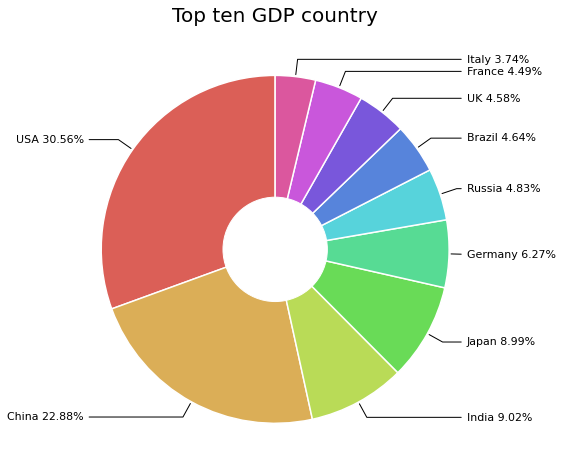

In [34]:
# pie chart with outside annotate box
apie=Pie_plot()                 
apie.Pie('1.xlsx',value=['quants'],  label=['country'], paper_type='single',info_style='Outside_box',donut=True,title='Top ten GDP country',actual_values=False)

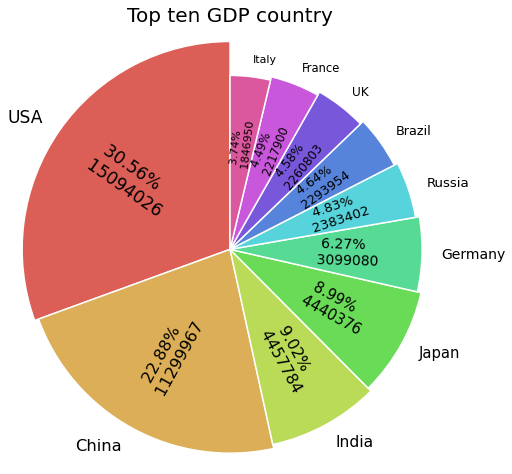

In [35]:
# pie chart with changeable radius and font size
bpie=Pie_plot()                 
bpie.Pie('1.xlsx',value=['quants'],  label=['country'], paper_type='single',info_style='Change_both',donut=False,title='Top ten GDP country',actual_values=True)

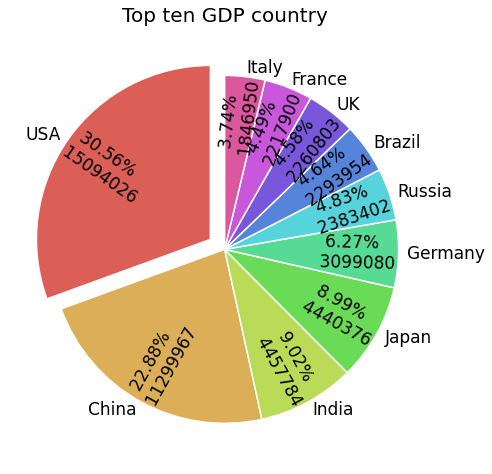

In [36]:
# simple annotation pie chart with some label exploration and actual values
cpie=Pie_plot()                 
cpie.Pie('1.xlsx',value=['quants'],  label=['country'], paper_type='single',info_style='Simple',donut=False,explode=True,explode_label='USA',title='Top ten GDP country',actual_values=True)

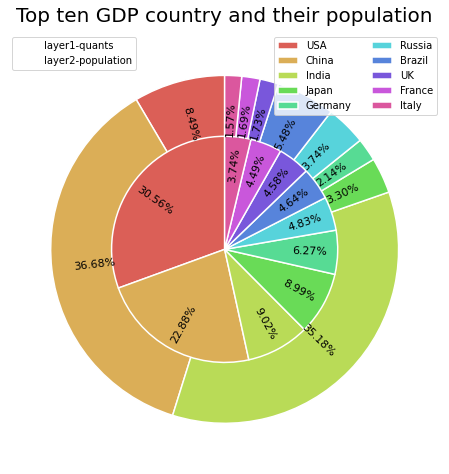

In [37]:
#multi-layer pie chart
dpie=Pie_plot()
dpie.Pie('2.xlsx',value=['quants','population'],  label=['country'], paper_type='single' ,title='Top ten GDP country and their population' ,plot_type='Simple')